# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

!wget https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv

data = pd.read_csv('clusters.csv')
data.head()


--2022-09-16 05:51:09--  https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/clusters.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56935 (56K) [text/plain]
Saving to: ‘clusters.csv’

clusters.csv        100%[===================>]  55.60K  --.-KB/s    in 0.01s   

2022-09-16 05:51:10 (4.97 MB/s) - ‘clusters.csv’ saved [56935/56935]



,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

## We begin with data explotarion
Checking for missing data.

In [ ]:
# Your code to create a clustering solution
data.isnull().sum()

A    0
B    0
C    0
dtype: int64

There is no missing data, then we check some statistics of the data set.

In [2]:
data.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,1.513081,1.520776,1.498351
std,1.250841,1.247587,1.267040
min,-1.649121,-1.631006,-1.921651
25%,0.542161,0.561720,0.483172
50%,1.520402,1.526202,1.466841
75%,2.483222,2.505169,2.485410
max,4.497581,4.442727,4.678731


### Using PCA to see the data in a 2D plot
First we normalize the data, then we transform the dataset to its two principal components.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(data[data.columns[0:3]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]


array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

Here now we can plot to see the scatter, with this we can imagine some clusters before train any model.

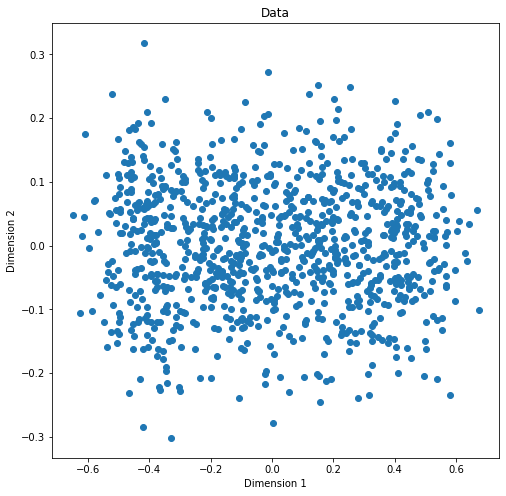

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Just by looking to the data we can say that it could be four clusters, we need now a model to affirm this.

Training simple models with different number of cluster and see their WCSS to select the appropiate number of clusters. 

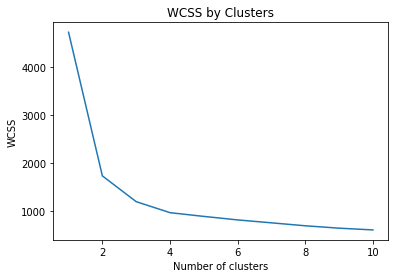

In [9]:
#importing the libraries
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(data.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we said before, four clusters is the ideal model for this dataset, now let's train a more especific model using sklearn KMeans method, using the raw data, not the 2d transformed one.

In [10]:
from sklearn.cluster import KMeans

# Create a model based on 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=100, max_iter=1000)
# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(data.values)
# View the cluster assignments
km_clusters

array([1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 2, 2, 0, 3, 2, 2, 1, 2,
       1, 1, 2, 3, 0, 1, 3, 2, 3, 1, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 2, 2, 1, 3, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 0, 2, 3, 2, 0, 2, 0, 3, 2, 3, 0, 3, 2, 3, 0, 2, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 0, 1, 3, 3,
       3, 2, 3, 3, 2, 1, 2, 3, 1, 3, 3, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 3, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 3,
       3, 2, 2, 1, 2, 1, 3, 3, 2, 0, 1, 0, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 3, 1, 0, 2, 2, 0, 1, 0,
       2, 1, 3, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 0, 3, 0, 3,
       0, 2, 2, 3, 0, 1, 1, 2, 0, 2, 3, 3, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2,
       1, 2, 3, 3, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 0, 0, 0, 2, 2, 3, 1, 0,

We get the assigments. We define a function that plots the assigments of the clusters for each data point.

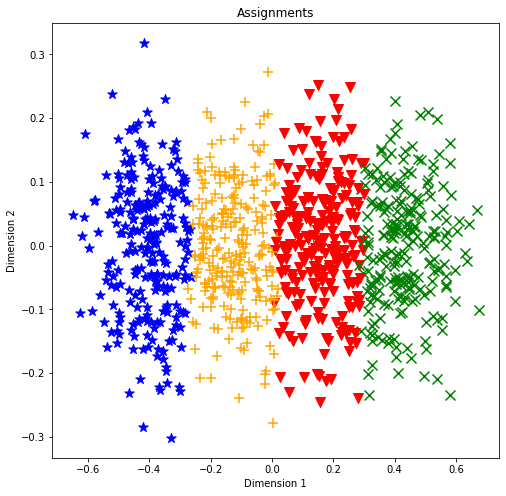

In [13]:
def plot_clusters(samples, clusters):
    fig = plt.figure(figsize=(8,8))
    col_dic = {0:'blue',1:'green',2:'orange', 3:'red'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'v'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0],
                    samples[sample][1],
                    color = colors[sample],
                    marker=markers[sample],
                    s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)



This is how the clusters look like.

### Using Hierarchical clustering
We could use other model to create the clusters as example we use Agglomerative Clustering from sklean.

In [19]:
from sklearn.cluster import  AgglomerativeClustering

AggModel = AgglomerativeClustering(n_clusters=4)
AggClusters = AggModel.fit_predict(data.values)
AggClusters


array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

Now we plot this cluster to see the result.

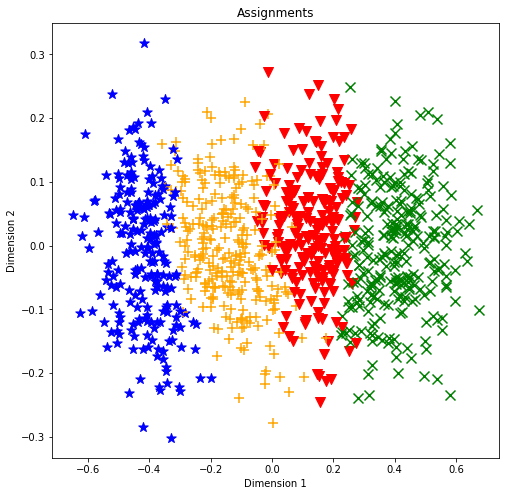

In [21]:
plot_clusters(features_2d, AggClusters)

This is the result of agglomeration clustering.

In [24]:
#Just for fun let's compare the two models
print((km_clusters==AggClusters).sum()/len(AggClusters))

0.887
